# Rule 2: Non-public bid opening (tender/procurementMethod)

In [1]:
# import libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import folium
import gc
import math
import numpy as np
from pandas import DataFrame

In [2]:
#Read original CSV files to extract required data fields (procurement method, amount, buyer, region, cycle)
l = [i for i in range(1,14)]
for n in l:
    s="c"+str(n)+".csv"
    data=pd.read_csv(s)
    contratos=data[['releases']]
    
    a=[]#list of contract amounts
    b=[]#list of buyers
    c=[]#list of regions
    d=[]#List of cycles
    e=[]#List of numberofTenders0
    f=[]#List of numberofTenders1
    g=[]#List of numberofTenders2
    h=[]#List of numberofTenders3
    i=[]#List of numberofTenders4
    j=[]#List of contractamount0
    k=[]#List of contractamount1
    k0=[]#List of contractamount2
    k1=[]#List of awardCriteria
    
    
    #Read json to extract data fields in contratos
    for n in contratos.iterrows():
        cifra=json.loads(n[1]["releases"])
        r=len(cifra)-1
        amount=0
        buyer="unknown"
        region="unknown"
        amount0=0
        amount1=0
        amount2=0
        
        #Get cycle
        try:
            cycle=cifra[r]["cycle"] 
        except:
            cycle=cifra[r]["ciclo"]
        
        #Get sum of amounts
        try:
            for m in cifra[0]["contracts"]:
                amount0=amount0+(m["value"]["amount"])
        except:
            amount0=0
        
        #Get sum of amounts
        try:
            for m in cifra[r]["contracts"]:
                amount=amount+(m["value"]["amount"])
        except:
            amount=0
        
        #Get sum of amounts
        try:
            for m in cifra[r]["contracts"]:
                amount1=amount1+(m["valueWithTax"]["amount"])
        except:
            amount1=0

        #Get sum of amounts
        try:
            for m in cifra[0]["contracts"]:
                amount2=amount2+(m["valueWithTax"]["amount"])
        except:
            amount2=0
        
        #Get number of tenders 0
        try:
            numberofTenders0=cifra[0]["tender"]["numberOfTenderers"] 
        except:
            numberofTenders0=0

            
        #Get number of tenders final
        try:
            numberofTenders1=cifra[r]["tender"]["numberOfTenderers"] 
        except:
            numberofTenders1=0

        #Get number of tenders 0
        try:
            numberofTenders2=len(cifra[r]["tender"]["tenderers"]) 
        except:
            numberofTenders2=0
            
        #Get number of tenders final
        try:
            numberofTenders3=len(cifra[0]["tender"]["tenderers"]) 
        except:
            numberofTenders3=0
            
        numberofTenders4=0
        
        for m in cifra[r]["parties"]:            
            #Get number of tenders
            try:
                if (m["roles"][0]=="tenderer" or m["roles"][0]=="supplier" or m["roles"][0]==["tenderer","supplier"]):
                    numberofTenders4=numberofTenders4+1
            except:
                numberofTenders4=0  
            
            
            #Get buyer
            try:
                if m["roles"][0]=="buyer":
                    buyer=m["name"]
            except:
                buyer="unknown"                
            
            #Get region
            try:
                if m["roles"][0]=="procuringEntity":
                    region=m["address"]["region"]
            except:
                region="unknown"

        #Get award criteria
        try:
            awardCriteria=cifra[r]["tender"]["awardCriteria"] 
        except:
            awardCriteria="unknown"
                

                

        b.append(buyer)
        c.append(region)
        d.append(cycle)
        e.append(numberofTenders0)
        f.append(numberofTenders1)
        g.append(numberofTenders2)
        h.append(numberofTenders3)
        i.append(numberofTenders4)
        a.append(amount)
        j.append(amount0)
        k.append(amount1)
        k0.append(amount2)
        k1.append(awardCriteria)
        
    tenderers=data[["ocid","compiledRelease.tender.procurementMethod",'compiledRelease.buyer.name','compiledRelease.tender.value.amount']]
    tenderers['procuringEntity'] = b
    tenderers['region'] = c
    tenderers['cycle'] = d    
    tenderers['numberofTenders0'] = e
    tenderers['numberofTenders1'] = f
    tenderers['numberofTenders2'] = g
    tenderers['numberofTenders3'] = h
    tenderers['numberofTenders4'] = i
    tenderers['amount0'] = a
    tenderers['amount'] = j
    tenderers['amount1'] = k
    tenderers['amount2'] = k0
    tenderers['awardCriteria'] = k1


    #Appending result to a new CSV
    #Remove , and rowsIDs later
    tenderers.to_csv("procurementMethod2.csv", mode = 'a',index=False)
    
# Destroy unused objects
del a,b,c,d,amount,buyer,region,cycle,tenderers,contratos,data
# Run garbage collection process 
gc.collect()

C:\Users\Dagoberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:142: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dagoberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dagoberto\Anaconda3\lib\site-packages\ipykernel_launcher.py:144: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

26

In [4]:
#Read new file
data=pd.read_csv("procurementMethod2.csv", encoding ='latin1', header=None,skiprows=[0])
data=data.rename(columns={0:'ocid',1:'procurementMethod',2:'buyer1',3:'amount',4:'buyer2',5:'region',6:'cycle',7:'nTender0',8:'nTender1',9:'nTender2',10:'nTender3',11:'nTender4',12:'amount0',13:'amount1',14:'amount2',15:'amount3',})

In [5]:
data.head()

,ocid,procurementMethod,buyer1,amount,buyer2,region,cycle,nTender0,nTender1,nTender2,nTender3,nTender4,amount0,amount1,amount2,amount3
0,ocds-07smqs-1072,NaN,NaN,NaN,delegación SEDESOL en Tabasco,unknown,2017,0,0,0,0,1,0.0,0.0,1072.00,1072.00
1,ocds-07smqs-1111,NaN,NaN,NaN,delegación SEDESOL en México,unknown,2017,0,0,0,0,1,0.0,0.0,357700.00,357700.00
2,ocds-07smqs-1117,NaN,NaN,NaN,Instituto Nacional de Antropología e Historia,unknown,2017,0,0,0,0,1,0.0,0.0,904739.24,904739.24
3,ocds-07smqs-1182,NaN,NaN,NaN,Servicio de Administración Tributaria,unknown,2017,0,0,0,0,1,0.0,0.0,3326.88,3326.88
4,ocds-07smqs-1191,NaN,NaN,NaN,delegación SEDESOL en Tabasco,unknown,2017,0,0,0,0,1,0.0,0.0,1191.33,1191.33


In [6]:
#Define function to identify finalAmount

def f(row):
    try:
        isNumber=not(math.isnan(row['amount']))
    except ValueError:
        isNumber=False
    if isNumber:
        maxValue=max(row['amount'],row['amount0'],row['amount1'],row['amount2'],row['amount3'])
    else:
        maxValue=max(row['amount0'],row['amount1'],row['amount2'],row['amount3'])
    return maxValue

def g(row):
    maxValue=max(row['nTender0'],row['nTender1'],row['nTender2'],row['nTender3'],row['nTender4'])
    return maxValue



#Apply function to dataframe
data['finalAmount'] = data.apply(f, axis=1)
data['finalNTender'] = data.apply(g, axis=1)

#Label unknown procurement methods
#mask = data.procurementMethod == "0"
#column_name = 'procurementMethod'
data.loc[data.region == "0", 'region'] = "unknown"
data.loc[data.region == 'Ciudad de México','region'] = "Ciudad de Mexico"
data.loc[data.region == 'Michoacán','region'] = "Michoacan"
data.loc[data.region == 'México','region'] = "Mexico"
data.loc[data.region == 'Nuevo León','region'] = "Nuevo Leon"
data.loc[data.region == 'Querétaro','region'] = "Queretaro"
data.loc[data.region == 'San Luis Potosí','region'] = "San Luis Potosi"
data.loc[data.region == 'Yucatán','region'] = "Yucatan"

my_nan=data['procurementMethod'].tolist()
l_new=['unknown' if x is np.nan else x for x in my_nan]
dt=pd.DataFrame(np.array(l_new).reshape(300264,1))
data['procurementMethod']=dt

#data.drop(['Ciudad de México','Michoacán','México','Nuevo León','Querétaro','San Luis Potosí'], axis=1)


In [6]:
data.head()

,ocid,procurementMethod,buyer1,amount,buyer2,region,cycle,nTender0,nTender1,nTender2,nTender3,nTender4,amount0,amount1,amount2,amount3,finalAmount,finalNTender
0,ocds-07smqs-1072,unknown,NaN,NaN,delegación SEDESOL en Tabasco,unknown,2017,0,0,0,0,1,0.0,0.0,1072.00,1072.00,1072.00,1
1,ocds-07smqs-1111,unknown,NaN,NaN,delegación SEDESOL en México,unknown,2017,0,0,0,0,1,0.0,0.0,357700.00,357700.00,357700.00,1
2,ocds-07smqs-1117,unknown,NaN,NaN,Instituto Nacional de Antropología e Historia,unknown,2017,0,0,0,0,1,0.0,0.0,904739.24,904739.24,904739.24,1
3,ocds-07smqs-1182,unknown,NaN,NaN,Servicio de Administración Tributaria,unknown,2017,0,0,0,0,1,0.0,0.0,3326.88,3326.88,3326.88,1
4,ocds-07smqs-1191,unknown,NaN,NaN,delegación SEDESOL en Tabasco,unknown,2017,0,0,0,0,1,0.0,0.0,1191.33,1191.33,1191.33,1


procurementMethod  direct   open  selective  unknown
cycle                                               
2015                   11      0          0        0
2016                  959     11          2        0
2017               131069  11113      12188     5334
2018               118539   9268       9117     2653


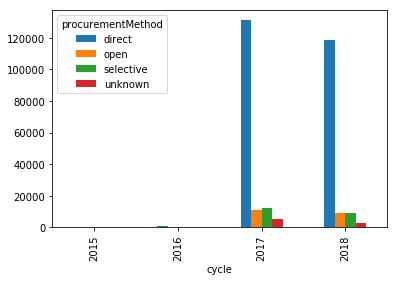

In [98]:
#Create pivot table with the count of contracts by year and procurementMethod
year=data.groupby(['cycle','procurementMethod'])['procurementMethod'].aggregate('count').unstack()
print(year.fillna(0).astype(int))

#Plot pivot table
year.plot(kind='bar')
plt.show()

Most of the contracts correspond to the years 2017 and 2018. Direct contracting is the preferred method.

procurementMethod  direct  open  selective  unknown
cycle                                              
2015                  100     0          0        0
2016                   98     1          0        0
2017                   82     6          7        3
2018                   84     6          6        1


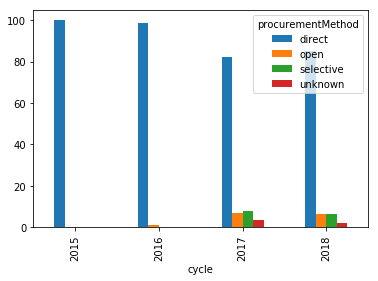

In [99]:
#Create pivot table with the count of contracts by year and procurementMethod
year=data.groupby(['cycle','procurementMethod'])['procurementMethod'].aggregate('count')
year_pcts = year.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).unstack()
print(year_pcts.fillna(0).astype(int))

#Plot pivot table
year_pcts.plot(kind='bar')
plt.show()

For all years more than 80% of the contracts are assigned directly.

In [100]:
#Create pivot table with the count of contracts by year and procurementMethod
region=data.groupby(['region','procurementMethod'])['procurementMethod'].aggregate('count')
region_pcts =region.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).unstack()

a=DataFrame(region_pcts.fillna(0).astype(int).to_records())
a=a[a.region!="unknown"].sort_values(by='direct', ascending=False)
print(a)

                 region  direct  open  selective  unknown
6      Ciudad de Mexico      91     3          4        0
10           Guanajuato      88     8          2        0
7              Coahuila      87     8          3        0
13              Jalisco      87     5          7        0
15            Michoacan      85     7          6        0
25               Sonora      85     7          7        0
21            Queretaro      84     7          7        0
30              Yucatan      84    10          4        0
5             Chihuahua      84    11          3        0
1       Baja California      84    13          2        0
12              Hidalgo      84     8          6        0
2   Baja California Sur      83     9          6        0
20               Puebla      81     8          9        0
14               Mexico      81     7         11        0
18           Nuevo Leon      80    10          9        0
16              Morelos      78    16          4        0
17            

In [13]:
region=data.groupby(['region','procurementMethod'])['procurementMethod'].aggregate('count')

a=DataFrame(region.unstack().fillna(0).astype(int))
a

procurementMethod,direct,open,selective,unknown
region,,,,
Aguascalientes,516,220,72,0
Baja California,2101,336,58,0
Baja California Sur,2323,261,186,3
Campeche,752,155,186,0
Chiapas,1912,400,437,0
Chihuahua,2105,285,93,0
Ciudad de Mexico,139521,5362,7171,4
Coahuila,2990,288,124,0
Colima,1028,232,107,1


In [101]:
#https://gist.github.com/ponentesincausa/46d1d9a94ca04a56f93d#file-mexico-json
mexicoGeo = r'mexico.json' # geojson file

# create a plain mexican map
mexico_map = folium.Map(location=[24,-103], zoom_start=5) #tiles='Mapbox Bright'

# generate choropleth map using the total % of direct contracts by state
folium.Choropleth(
    geo_data=mexicoGeo,
    data=a,
    columns=['region', 'direct'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='% of direct contracts by state'
).add_to(mexico_map)

# display map
mexico_map

procurementMethod  direct  open  selective  unknown
cycle                                              
2015                    2     0          0        0
2016                  168     5          0        0
2017                 8430  6695       5182     1999
2018                 8330  5914       4603      575


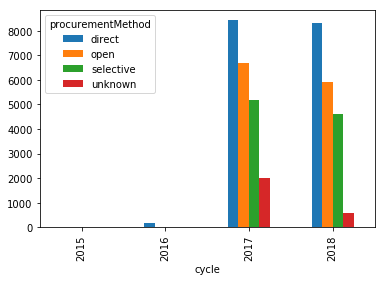

In [102]:
#Create pivot table with the count of contracts by year and procurementMethod for high value contracts
year=data.loc[data['finalAmount'] >= 1000000].groupby(['cycle','procurementMethod'])['procurementMethod'].aggregate('count').unstack()
print(year.fillna(0).astype(int))

#Plot pivot table
year.plot(kind='bar')
plt.show()

In the case of high value contracts (amount>= 1000000) the number of open contracts is subtantially higher

procurementMethod  direct  open  selective  unknown
cycle                                              
2015                  100     0          0        0
2016                   97     2          0        0
2017                   37    30         23        8
2018                   42    30         23        2


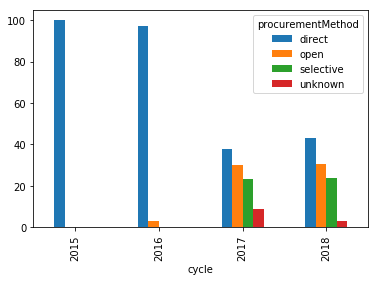

In [103]:
#Create pivot table with the count of contracts by year and procurementMethod
year=data.loc[data['finalAmount'] >= 1000000].groupby(['cycle','procurementMethod'])['procurementMethod'].aggregate('count')
year_pcts = year.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).unstack()
print(year_pcts.fillna(0).astype(int))

#Plot pivot table
year_pcts.plot(kind='bar')
plt.show()

For high value contracts the proportion of direct contracts is around 40% in 2017 and 2018

In [16]:
#Create pivot table with the count of contracts by year and procurementMethod
region=data.loc[data['finalAmount'] >= 1000000].groupby(['region','procurementMethod'])['procurementMethod'].aggregate('count')
region_pcts =region.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).unstack()

a=DataFrame(region_pcts.fillna(0).astype(int).to_records())
a=a[a.region!="unknown"].sort_values(by='direct', ascending=False)
print(a)

                 region  direct  open  selective  unknown
6      Ciudad de Mexico      57    22         19        0
7              Coahuila      55    38          6        0
14               Mexico      53    28         18        0
25               Sonora      53    34         11        0
12              Hidalgo      50    39         10        0
1       Baja California      50    43          6        0
5             Chihuahua      48    45          6        0
10           Guanajuato      48    43          7        0
2   Baja California Sur      47    43          9        0
18           Nuevo Leon      45    32         21        0
19               Oaxaca      44    40         15        0
24              Sinaloa      44    39         16        0
15            Michoacan      42    37         20        0
31            Zacatecas      42    52          5        0
28             Tlaxcala      42    36         20        0
30              Yucatan      41    48         10        0
13            

In [14]:
region=data.loc[data['finalAmount'] >= 1000000].groupby(['region','procurementMethod'])['procurementMethod'].aggregate('count')
a=DataFrame(region.unstack().fillna(0).astype(int))
a

procurementMethod,direct,open,selective,unknown
region,,,,
Aguascalientes,33,133,12,0
Baja California,180,155,24,0
Baja California Sur,155,143,30,0
Campeche,20,87,44,0
Chiapas,248,276,221,0
Chihuahua,160,152,20,0
Ciudad de Mexico,8032,3163,2694,2
Coahuila,151,105,18,0
Colima,55,86,54,1


In [19]:
#https://gist.github.com/ponentesincausa/46d1d9a94ca04a56f93d#file-mexico-json
mexicoGeo = r'mexico.json' # geojson file

# create a plain mexican map
mexico_map = folium.Map(location=[24,-103], zoom_start=5) #tiles='Mapbox Bright'

# generate choropleth map using the total % of direct contracts by state
folium.Choropleth(
    geo_data=mexicoGeo,
    data=a,
    columns=['region', 'direct'],
    key_on='feature.properties.name',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='% of direct contracts by state >= 1,000,000 pesos'
).add_to(mexico_map)

# display map
mexico_map.save("map.html")
mexico_map

In [8]:
nTenders0=data.loc[data.finalNTender != 0]
nTenders0

,ocid,procurementMethod,buyer1,amount,buyer2,region,cycle,nTender0,nTender1,nTender2,nTender3,nTender4,amount0,amount1,amount2,amount3,finalAmount,finalNTender
0,ocds-07smqs-1072,unknown,NaN,NaN,delegación SEDESOL en Tabasco,unknown,2017,0,0,0,0,1,0.00,0.00,1072.00,1072.00,1072.00,1
1,ocds-07smqs-1111,unknown,NaN,NaN,delegación SEDESOL en México,unknown,2017,0,0,0,0,1,0.00,0.00,357700.00,357700.00,357700.00,1
2,ocds-07smqs-1117,unknown,NaN,NaN,Instituto Nacional de Antropología e Historia,unknown,2017,0,0,0,0,1,0.00,0.00,904739.24,904739.24,904739.24,1
3,ocds-07smqs-1182,unknown,NaN,NaN,Servicio de Administración Tributaria,unknown,2017,0,0,0,0,1,0.00,0.00,3326.88,3326.88,3326.88,1
4,ocds-07smqs-1191,unknown,NaN,NaN,delegación SEDESOL en Tabasco,unknown,2017,0,0,0,0,1,0.00,0.00,1191.33,1191.33,1191.33,1
5,ocds-07smqs-1230,unknown,NaN,NaN,delegación SEDESOL en Tabasco,unknown,2017,0,0,0,0,1,0.00,0.00,12306.44,12306.44,12306.44,1
6,ocds-07smqs-1337,unknown,NaN,NaN,delegación SEDESOL en México,unknown,2017,0,0,0,0,1,0.00,0.00,625433.53,625433.53,625433.53,1
7,ocds-07smqs-1356,unknown,NaN,NaN,delegación SEDESOL en México,unknown,2017,0,0,0,0,1,0.00,0.00,127008.00,127008.00,127008.00,1
9,ocds-07smqs-1444,unknown,NaN,NaN,delegación SEDESOL en Tabasco,unknown,2017,0,0,0,0,1,0.00,0.00,1444.20,1444.20,1444.20,1
10,ocds-07smqs-1457,unknown,NaN,NaN,delegación SEDESOL en México,unknown,2017,0,0,0,0,2,0.00,0.00,88819.11,88819.11,88819.11,2


In [13]:
#Create pivot table with the count of contracts by year and procurementMethod
nTenders_by_procurmentMethod=nTenders0.groupby('procurementMethod')['finalNTender'].mean()
#print(year.fillna(0).astype(int))
print(nTenders_by_procurmentMethod)

procurementMethod
direct       1.288261
open         4.667841
selective    2.499568
unknown      1.250760
Name: finalNTender, dtype: float64


In [14]:
nTenders0=data.loc[data.finalNTender != 0]
nTenders1=nTenders0.loc[nTenders0.procurementMethod=="open"]
print(len(nTenders1))
#Create pivot table with the count of contracts by year and procurementMethod
nTenders_by_procurmentMethod=nTenders1.groupby('procurementMethod')['finalNTender'].mean()
#print(year.fillna(0).astype(int))
print(nTenders_by_procurmentMethod)

19018
procurementMethod
open    4.667841
Name: finalNTender, dtype: float64


In [15]:
nTenders0=data.loc[data.finalNTender ==1]
nTenders1=nTenders0.loc[nTenders0.procurementMethod=="open"]
print(len(nTenders1))
#Create pivot table with the count of contracts by year and procurementMethod
nTenders_by_procurmentMethod=nTenders1.groupby('procurementMethod')['finalNTender'].mean()
#print(year.fillna(0).astype(int))
print(nTenders_by_procurmentMethod)

5901
procurementMethod
open    1
Name: finalNTender, dtype: int64


In [14]:
#Create pivot table with the count of contracts by year and procurementMethod
nTenders_by_procurmentMethod=nTenders0.loc[nTenders0['finalAmount'] >= 1000000].groupby('procurementMethod')['finalNTender'].mean()
#print(year.fillna(0).astype(int))
print(nTenders_by_procurmentMethod)

procurementMethod
direct       2.159478
open         5.100087
selective    2.278637
unknown      1.518157
Name: finalNTender, dtype: float64


In [5]:
#Create pivot table with the count of contracts by year and procurementMethod
buyer=data.groupby(['buyer2','procurementMethod'])['procurementMethod'].aggregate('count').unstack()
a=DataFrame(buyer.fillna(0).astype(int).to_records())
a["total"]=a["direct"]+a["open"]+a["selective"]+a["unknown"]
a=a[a.buyer2!="unknown"].sort_values(by='total', ascending=False)
a

,buyer2,direct,open,selective,unknown,total
189,"Diconsa, S.A. de C.V.",56866,136,162,0,57164
431,Instituto Mexicano del Seguro Social,22619,4516,2920,8,30063
478,Instituto de Seguridad y Servicios Sociales de...,17341,1152,848,0,19341
119,Comisión Federal de Electricidad,7648,1451,3658,0,12757
472,Instituto de Administración y Avalúos de Biene...,9863,12,27,104,10006
461,Instituto Nacional de la Infraestructura Físic...,5523,98,35,0,5656
524,"Secretaría de Desarrollo Agrario, Territorial ...",5582,4,9,0,5595
140,Comisión Nacional del Agua,2250,1063,1207,577,5097
104,Centro de Investigación y de Estudios Avanzado...,4400,89,63,43,4595
435,Instituto Nacional de Bellas Artes y Literatura,3493,60,49,54,3656


In [8]:
#Create pivot table with the count of contracts by year and procurementMethod
buyer=data.loc[data['finalAmount'] >= 1000000].groupby(['buyer2','procurementMethod'])['procurementMethod'].aggregate('count').unstack()
a=DataFrame(buyer.fillna(0).astype(int).to_records())
a["total"]=a["direct"]+a["open"]+a["selective"]+a["unknown"]
a=a[a.buyer2!="unknown"].sort_values(by='total', ascending=False)
a
#a.to_csv("1000000.csv", header=False, mode = 'a',index=False)

,buyer2,direct,open,selective,unknown,total
353,Instituto Mexicano del Seguro Social,2969,2496,1078,2,6545
165,"Diconsa, S.A. de C.V.",2629,74,54,0,2757
131,Comisión Nacional del Agua,528,737,626,176,2067
112,Comisión Federal de Electricidad,76,780,1081,0,1937
398,Instituto de Seguridad y Servicios Sociales de...,727,630,298,0,1655
433,Secretaría de Comunicaciones y Transportes,397,738,437,0,1572
37,Caminos y Puentes Federales de Ingresos y Serv...,118,813,8,0,939
134,Comisión Nacional para el Desarrollo de los Pu...,104,194,236,13,547
16,"Administración Portuaria Integral de Veracruz,...",229,34,269,0,532
182,Dirección General de Comunicación Social,399,6,17,16,438
